<a href="https://colab.research.google.com/github/hamsungmin/DataTrainAnalysis/blob/main/Project/MobileGame/2.ltv_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LTV 예측 모델

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
users = pd.read_csv('/content/drive/MyDrive/MobileGame/users.csv')

# Feature 선택
X = users[['session_count', 'in_game_events', 'last_session_days']]
y = users['total_spend']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# RandomForestRegressor 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [5]:
# 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")

MSE: 497.85, R2: -0.26


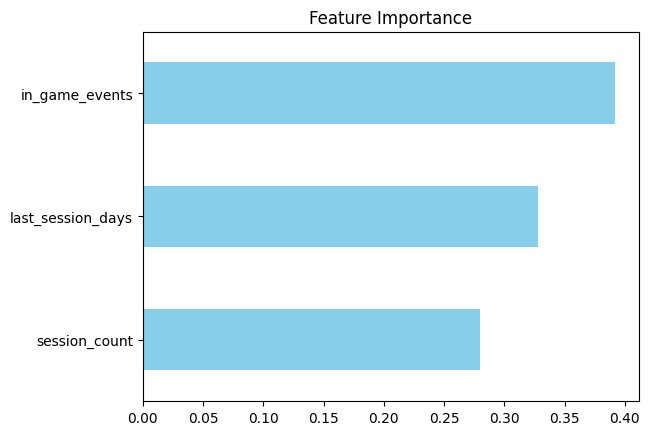

In [6]:
# Feature Importance 시각화
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.show()

In [8]:
# 인사이트
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"- {feature}: 중요도 {importance:.2f}")

- session_count: 중요도 0.28
- in_game_events: 중요도 0.39
- last_session_days: 중요도 0.33


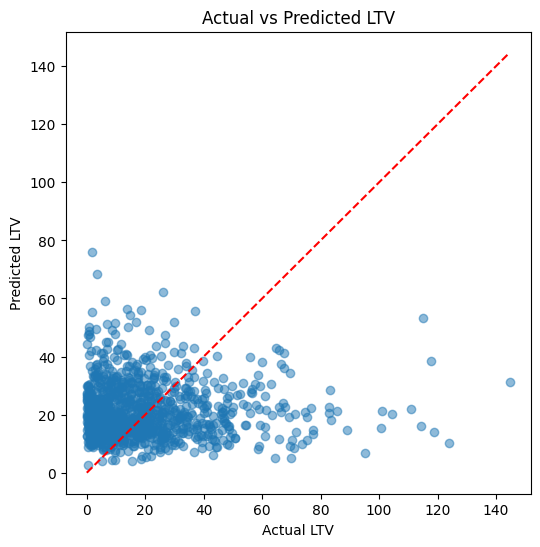

In [9]:
# 예측값 vs 실제값 시각화
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel("Actual LTV")
plt.ylabel("Predicted LTV")
plt.title("Actual vs Predicted LTV")
plt.show()

- 세션 수(session_count)와 in-game 이벤트 수(in_game_events)가 LTV 예측에 가장 큰 영향을 줌
- 실제 대비 예측값이 크게 벗어난 일부 유저는 특수 이벤트 참여 여부나 광고 채널 영향 가능성 존재
